# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [19]:
data.isna().values.any()
data.duplicated().values.any()

False

In [40]:
data.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,5100000
6,4630,1927-12-08,Wings,2000000,0,0,-2000000
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,3979000
8,4240,1930-01-01,Hell's Angels,4000000,0,0,-4000000
9,5043,1931-12-31,Mata Hari,558000,900000,900000,342000


In [39]:
data.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
1867,1407,2002-08-30,FearDotCom,40000000,13208023,13208023,-26791977
3602,1179,2010-03-19,The Bounty Hunter,45000000,135808837,67061228,90808837
3543,4421,2009-12-31,The Deported,3000000,0,0,-3000000
2652,4951,2006-04-14,Hard Candy,950000,8267066,1024640,7317066
3762,5130,2010-10-15,I Want Your Money,400000,433588,433588,33588
1706,2262,2001-11-04,Josie and the Pussycats,22000000,14252830,14252830,-7747170
959,1159,1997-03-21,Liar Liar,45000000,302710615,181410615,257710615
3491,2933,2009-10-23,Ong-Bak 2,15000000,7583050,102458,-7416950
1747,3271,2002-01-02,Slackers,11000000,4814244,4814244,-6185756
670,2288,1993-03-19,Teenage Mutant Ninja Turtles III,21000000,42273609,42273609,21273609


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [13]:
for feature in ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']:
    data[feature] = data[feature].astype(str).str.replace('$','')
    data[feature] = data[feature].astype(str).str.replace(',','')
    data[feature] = pd.to_numeric(data[feature])

In [15]:
data.head()
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [21]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [41]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44","57,741,684.38"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00,"-175,000,000.00"
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50","-2,244,775.00"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00","8,122,000.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00","59,518,660.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27","140,972,329.93"


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [36]:
data['Profit'] = data.USD_Worldwide_Gross - data.USD_Production_Budget

In [25]:
"{:,.2f}".format(data.USD_Production_Budget.mean())

'31,113,737.58'

In [26]:
"{:,.2f}".format(data.USD_Worldwide_Gross.mean())

'88,855,421.96'

In [42]:
data[data['USD_Production_Budget'] == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941


In [43]:
data[data['USD_Production_Budget'] == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [46]:
data[data['USD_Domestic_Gross'] == 0].sort_values('USD_Production_Budget', ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [47]:
data[data['USD_Worldwide_Gross'] == 0].sort_values('USD_Production_Budget', ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


In [86]:
data.sort_values('USD_Worldwide_Gross', ascending = False)[:20]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,2007615668
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,1752662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,1456640593
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547,1294479547
4844,59,2015-03-04,Furious 7,190000000,1516748684,351032910,1326748684
4789,10,2015-01-05,Avengers: Age of Ultron,250000000,1404705868,459005868,1154705868
3925,231,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,1341511219,381011219,1216511219
4497,134,2013-11-22,Frozen,150000000,1274234980,400738009,1124234980
5330,115,2017-03-17,Beauty and the Beast,160000000,1260122363,504014165,1100122363


### Filtering on Multiple Conditions

In [48]:
international_releases = data.loc[(data.USD_Worldwide_Gross > 0) & (data.USD_Domestic_Gross == 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [51]:
international_releases = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [67]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
unreleased_films = data[data['Release_Date'] > scrape_date]

In [68]:
data_clean = data.drop(unreleased_films.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [69]:

unprofitable_films = data_clean[data_clean.USD_Worldwide_Gross < data_clean.USD_Production_Budget]
unprofiltable_film_count = unprofitable_films.Rank.count()
total_film_count = data_clean.Rank.count()
percentage_unprofitable = "{:.2f}%".format(100.0*unprofiltable_film_count/total_film_count)
percentage_unprofitable

'37.28%'

# Seaborn for Data Viz: Bubble Charts

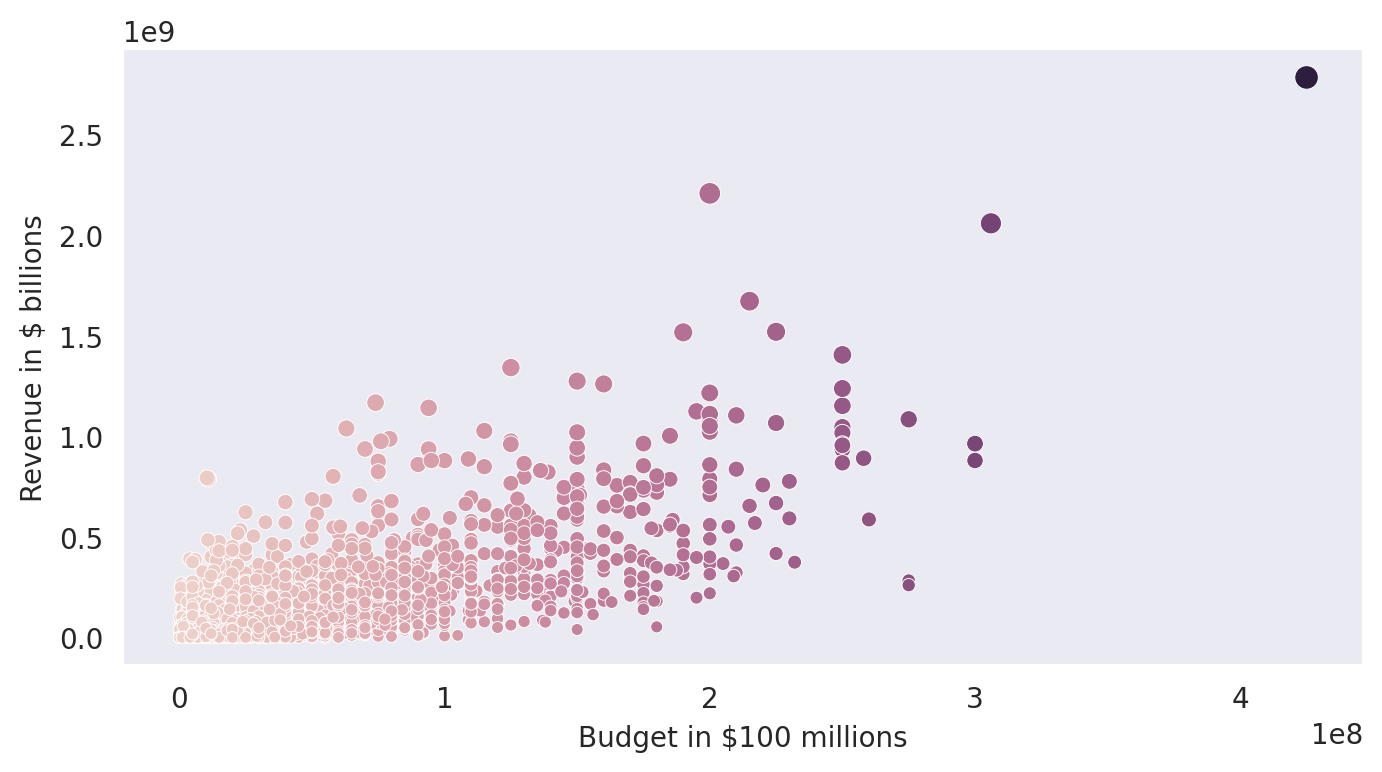

In [80]:
import seaborn as sns

plt.figure(figsize = (8,4), dpi = 200)

with sns.axes_style('dark'):
    ax = sns.scatterplot(data = data_clean,
            x = 'USD_Production_Budget',
            y = 'USD_Worldwide_Gross',
            hue = 'USD_Production_Budget',
            size = 'USD_Worldwide_Gross',
            legend = False)

    ax.set(ylabel = "Revenue in $ billions",
       xlabel = "Budget in $100 millions")

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



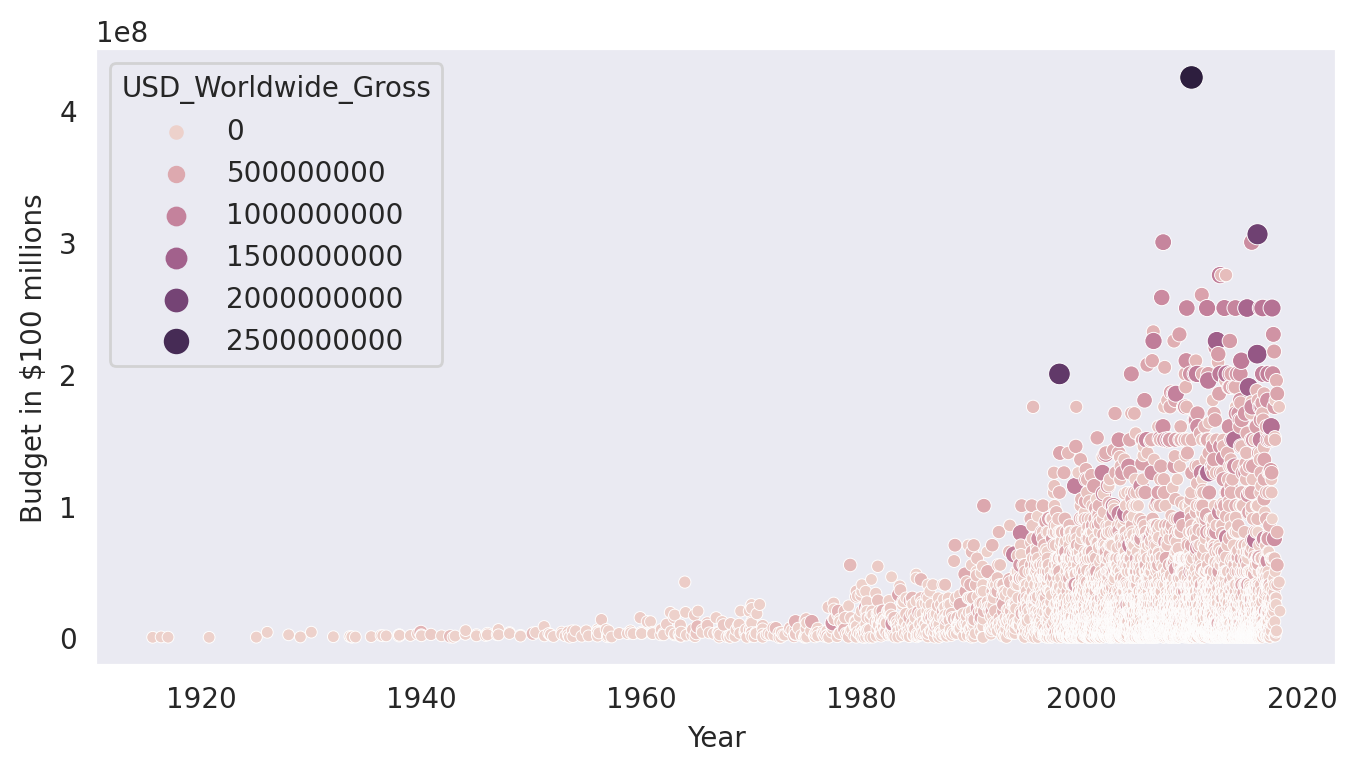

In [84]:

plt.figure(figsize = (8,4), dpi = 200)



with sns.axes_style('dark'):
    ax = sns.scatterplot(data = data_clean,
            x = 'Release_Date',
            y = 'USD_Production_Budget',
            hue = 'USD_Worldwide_Gross',
            size = 'USD_Worldwide_Gross')

    ax.set(ylabel = "Budget in $100 millions",
       xlabel = "Year")

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [90]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
years

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [92]:
decades = (years//10)*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [95]:
old_films = data_clean.loc[data_clean.Decade < 1970]
new_films = data_clean.loc[data_clean.Decade >= 1970]
old_films.shape

(153, 8)

In [98]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
count,153.00,153,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","25,808,336.73","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"-14,250,000.00","1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","2,175,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","7,364,370.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","27,402,877.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","386,625,192.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41","54,245,459.17",12.72


In [100]:
old_films.loc[old_films.USD_Production_Budget == 42000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960


In [114]:
old_films.sort_values('USD_Production_Budget', ascending = False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1960


In [115]:
old_films.sort_values('USD_Worldwide_Gross', ascending = False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
23,4248,1939-12-15,Gone with the Wind,3900000,390525192,198680470,386625192,1930
117,3594,1965-02-03,The Sound of Music,8200000,286214286,163214286,278014286,1960
28,4969,1942-08-13,Bambi,858000,268000000,102797000,267142000,1940
46,4434,1950-02-15,Cinderella,2900000,263591415,85000000,260691415,1950
18,4756,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925485,184925485,183437485,1930


In [99]:
new_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","58,872,059.83","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"-127,426,868.00","1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","-2,386,213.50","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","8,322,573.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","61,453,613.50","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68","142,586,941.57",9.58


# Seaborn Regression Plots

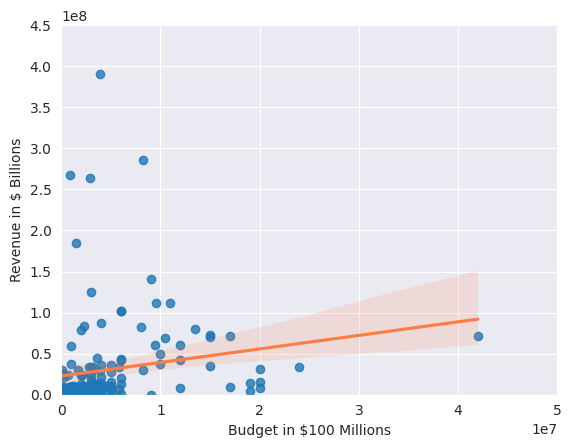

In [113]:
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data = old_films,
                    x = 'USD_Production_Budget',
                    y = 'USD_Worldwide_Gross',
                    line_kws = {"color": "#ff7c43"}
                    )
    
    ax.set( xlim = (0, 50000000),
           ylim = (0, 450000000),
        xlabel = "Budget in $100 Millions",
           ylabel = "Revenue in $ Billions")
    
plt.show()

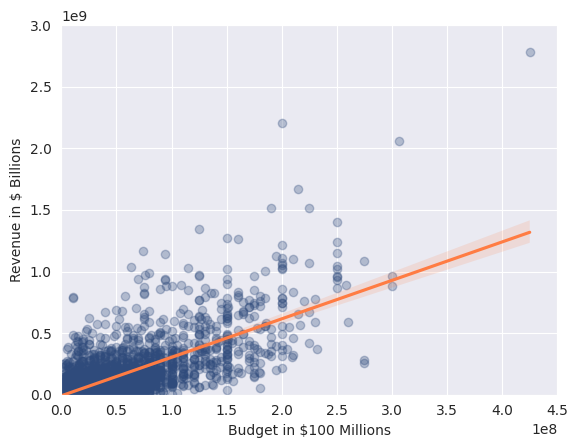

In [112]:
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data = new_films,
                    x = 'USD_Production_Budget',
                    y = 'USD_Worldwide_Gross',
                    scatter_kws = {"color": "#2f4b7c", "alpha" : 0.3},
                    line_kws = {"color": "#ff7c43"}
                    )
    
    ax.set( xlim = (0, 450000000),
           ylim = (0,3000000000),
        xlabel = "Budget in $100 Millions",
           ylabel = "Revenue in $ Billions")
    
plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regression = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [140]:
X = old_films[['USD_Production_Budget']]

y = old_films.USD_Worldwide_Gross

regression.fit(X, y)
regression.intercept_

22821538.635080382

In [141]:
regression.coef_

array([1.64771314])

In [137]:
X = new_films[['USD_Production_Budget']]

y = new_films.USD_Worldwide_Gross

regression.fit(X, y)
regression.intercept_

-8650768.006610304

In [138]:
regression.coef_

array([3.12259592])

In [139]:
regression.score(X,y)

0.5577032617720403

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [150]:
budget = 350000000
y_pred = regression.intercept_ + regression.coef_[0] * budget
"{:,.2f}".format(y_pred)

'599,521,139.04'